In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/BT_ML

/content/drive/My Drive/BT_ML


In [0]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import os

In [0]:
model_inceptionv3 = InceptionV3(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

In [0]:
# Đóng băng layer
for layer in model_inceptionv3.layers:
  layer.trainable=False

# model_inceptionv3.summary()

In [0]:
last_layer = model_inceptionv3.get_layer("mixed7")

In [0]:
last_layer = last_layer.output

In [0]:
x = Flatten()(last_layer)
x = Dense(512, activation="relu")(x)
x = Dense(2, activation="softmax")(x)

model = Model(model_inceptionv3.input, x)

model.summary()

In [0]:
train_dir = 'train_folder'
valid_dir = 'valid_folder'

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# generator
train_agu = ImageDataGenerator(1./255.0, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

test_agu = ImageDataGenerator(1./255.0)

# make date

train_generator = train_agu.flow_from_directory(train_dir, target_size=(224, 224), class_mode="categorical", batch_size=32, seed=42)

valid_generator = test_agu.flow_from_directory(valid_dir, target_size=(224, 224), class_mode="categorical", batch_size=32, seed=42)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [95]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [0]:
# Model checkpoint 
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "weights/cp-{val_acc:.2f}.ckpt"

checkpoint = ModelCheckpoint(filepath=filepath, monitor="val_acc", save_best_only=True, mode="max", verbose=1)

In [97]:
# Training using data generator
# 1. Compiling
model.compile(optimizer=RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["acc"])

# 2. Training using fit_generator
history = model.fit_generator(train_generator, steps_per_epoch=1027//32, epochs=50, validation_data=valid_generator, validation_steps=8, shuffle=True, verbose=1, callbacks=[checkpoint])

32/32 [==============================] - ETA: 0s - loss: 4.4576 - acc: 0.7899
Epoch 00016: val_acc did not improve from 0.88281
32/32 [==============================] - 17s 521ms/step - loss: 4.4576 - acc: 0.7899 - val_loss: 3.1658 - val_acc: 0.7695
Epoch 17/50
32/32 [==============================] - ETA: 0s - loss: 2.7443 - acc: 0.8037
Epoch 00017: val_acc did not improve from 0.88281
32/32 [==============================] - 17s 531ms/step - loss: 2.7443 - acc: 0.8037 - val_loss: 1.2873 - val_acc: 0.7773
Epoch 18/50
32/32 [==============================] - ETA: 0s - loss: 2.8210 - acc: 0.7276
Epoch 00018: val_acc did not improve from 0.88281
32/32 [==============================] - 17s 516ms/step - loss: 2.8210 - acc: 0.7276 - val_loss: 0.6269 - val_acc: 0.5430
Epoch 19/50
32/32 [==============================] - ETA: 0s - loss: 2.1144 - acc: 0.6141
Epoch 00019: val_acc did not improve from 0.88281
32/32 [==============================] - 17s 517ms/step - loss: 2.1144 - acc: 0.6141 -

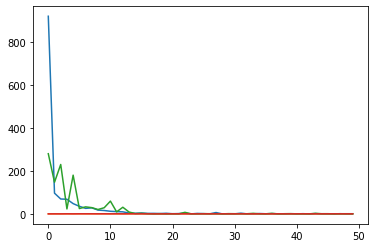

In [101]:
df = pd.DataFrame(history.history)

# plt.figure(figsize=())
plt.plot(df)
plt.show()

In [54]:
os.path.dirname(filepath)

'weights'

In [0]:
new_model = tensorflow.keras.models.load_model("./weights/cp-0.88.ckpt")

In [88]:
from keras.preprocessing import image
import numpy as np
path_image = "./valid_folder/horses/horse1-000.png"

img = image.load_img(path=path_image, target_size=(224, 224))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)


img.shape

(1, 224, 224, 3)

In [89]:
new_model.predict(img)

array([[0.37745014, 0.6225499 ]], dtype=float32)

In [65]:
pwd

'/content/drive/My Drive/BT_ML'

In [0]:
!rm -rf weights